# My Stock Market Analysis Project

For my stats class, I'm analyzing some financial data to see if there are any patterns in stock returns. Hoping to find some cool insights about which months might be good for investing!

## 1. Setting Up My Project

First, I need to grab some libraries to help with my data analysis.

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
# Load the financial dataset
try:
    df = pd.read_pickle('../XGboost_Roshan/src/data/dataset3.pkl')
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    # Try CSV version as fallback
    try:
        df = pd.read_csv('../XGboost_Roshan/src/data/dataset3.csv')
        print("CSV dataset loaded.")
    except:
        print("Could not load the dataset. Please check the file path.")
        df = None

Dataset loaded successfully.


## 2. What's In My Data?

Let's take a quick look at what I'm working with here.

In [3]:
# Display basic dataset information
if df is not None:
    print(f"Dataset dimensions: {df.shape} (rows, columns)")
    print("\nColumn names:")
    print(df.columns.tolist())
    
    # Display the first few rows
    print("\nFirst 5 rows:")
    display(df.head())

Dataset dimensions: (124798, 4) (rows, columns)

Column names:
['date', 'ticker', 'close', 'return']

First 5 rows:


,date,ticker,close,return
79112,2022-08-31,TMO,545.32,-0.016183
77067,2022-08-31,TJX,62.35,-0.003357
2405,2022-08-31,ALB,267.96,-0.017634
35376,2022-08-31,IT,285.32,-0.013246
61790,2022-08-31,PPG,126.98,-0.006261


## 3. Missing Data Check

Gotta make sure there aren't any big gaps in my dataset that would mess up the analysis.

In [4]:
# Check for missing values
if df is not None:
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    
    # Create DataFrame to display missing value statistics
    missing_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage (%)': missing_percent
    })
    
    # Show only columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0]
    
    if len(missing_df) > 0:
        print("Columns with missing values:")
        display(missing_df)
    else:
        print("No missing values found in the dataset.")

Columns with missing values:


,Missing Values,Percentage (%)
return,2,0.001603


## 4. Quick Stats Overview

Let's check out some basic numbers to understand what we're working with.

In [5]:
# Calculate basic summary statistics
if df is not None:
    # Extract numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    
    # Calculate summary statistics
    summary_stats = df[numeric_cols].describe().T
    
    # Display the summary statistics
    display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
close,124798.0,180.928770,332.252555,6.00000,60.890000,107.030000,203.260000,6466.000000
return,124796.0,0.000562,0.020093,-0.28353,-0.009805,0.000396,0.010627,0.398503


## 5. How Things Connect

Let's see which variables might be related to each other.

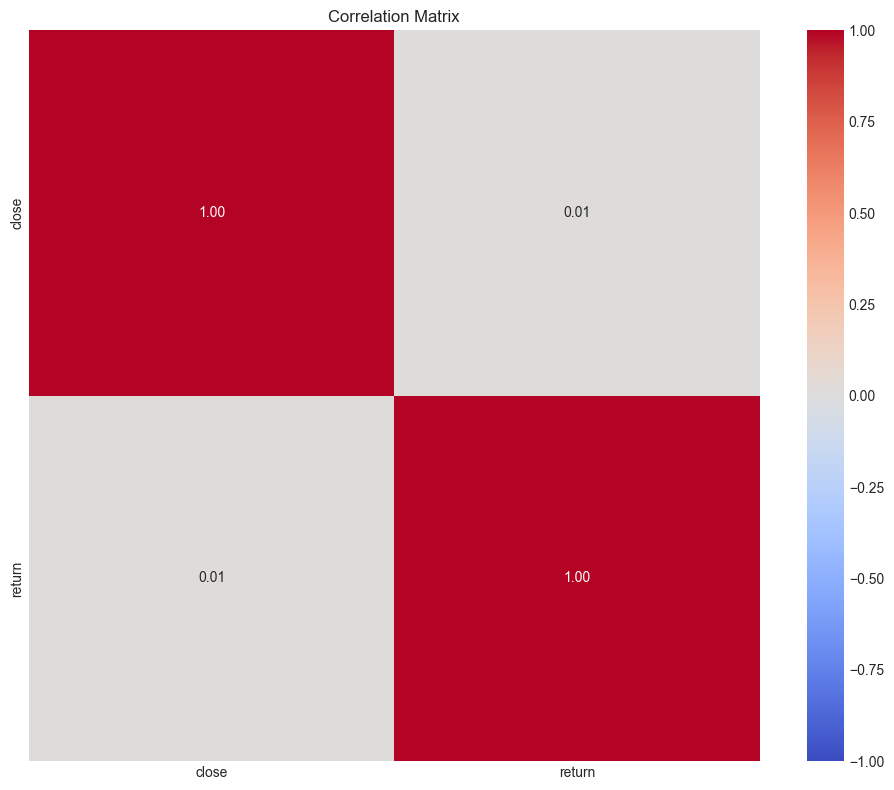

In [6]:
# Calculate and visualize correlation matrix
if df is not None:
    # Extract numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    
    # If too many columns, limit to manageable number
    if len(numeric_cols) > 10:
        numeric_cols = numeric_cols[:10]
        print("Showing correlations for first 10 numeric variables")
    
    # Calculate correlation matrix
    corr_matrix = df[numeric_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                vmin=-1, vmax=1, center=0, square=True)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

#  Monthly Returns Analysis

 I'm analyzing monthly stock returns to see if there are any patterns that could help with investing. I want to find out if some months are consistently better than others for the stock market.


## Step 1: Getting My Libraries Ready

First, I need to grab all the tools I'll need for this analysis:

In [7]:
# Basic data manipulation libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Visualization libraries
import matplotlib.pyplot as plt  # For creating charts
import seaborn as sns            # For enhanced visualizations

# Date manipulation
from datetime import datetime
from pathlib import Path  # For handling file paths

# Configure display settings for better output
pd.set_option('display.max_rows', 20)       # Show up to 20 rows
pd.set_option('display.max_columns', 10)    # Show up to 10 columns
pd.set_option('display.width', 1000)        # Set display width
pd.set_option('display.precision', 4)       # Show 4 decimal places

# Set the style for our plots
plt.style.use('seaborn-v0_8-whitegrid')  # Use a clean, modern style

## Step 2: Getting My Data

Now I need to grab the stock data I'll be working with:

## Step 2: Load Financial Data

Next, we'll create a function to load our financial data. We'll use the dataset from our workspace which contains stock prices and returns.

In [8]:
def load_data():
    """Load financial data from cache or CSV file."""
    # Define paths to our data files
    data_dir = Path('../XGboost_Roshan/src/data')
    data_path = data_dir / 'dataset3.csv'
    data_pickle = data_dir / 'dataset3.pkl'
    
    # Check if we have a cached version (faster to load)
    if data_pickle.exists():
        print(f"Loading data from cache: {data_pickle}")
        df = pd.read_pickle(data_pickle)
    else:
        print(f"Loading data from CSV: {data_path}")
        # Read the CSV and parse dates
        df = pd.read_csv(data_path, parse_dates=['date'], low_memory=False)
        # Sort by date to ensure chronological order
        df.sort_values('date', inplace=True)
    
    return df

# Load our financial data
df_all = load_data()

# Display first few rows to understand the data structure
print("\n Data Overview:")
df_all.head()

Loading data from cache: ../XGboost_Roshan/src/data/dataset3.pkl

 Data Overview:


,date,ticker,close,return
79112,2022-08-31,TMO,545.32,-0.0162
77067,2022-08-31,TJX,62.35,-0.0034
2405,2022-08-31,ALB,267.96,-0.0176
35376,2022-08-31,IT,285.32,-0.0132
61790,2022-08-31,PPG,126.98,-0.0063


## Step 3: Checking Out Available Stocks

Let's see what stocks I can work with in my dataset.

In [9]:
# Get unique ticker symbols
tickers = df_all['ticker'].unique()

# Display count and sample of available tickers
print(f"Total number of tickers: {len(tickers)}")
print(f"Sample tickers: {', '.join(tickers[:10])}...")

# Let's select one ticker for our analysis (you can change this to any ticker in the dataset)
selected_ticker = 'AAPL'  # Example: Apple Inc.

# Check if our selected ticker exists in the dataset
if selected_ticker in tickers:
    print(f"\nSelected ticker '{selected_ticker}' found in dataset")
    # Filter data for just this ticker
    df_ticker = df_all[df_all['ticker'] == selected_ticker].copy()
    print(f"Number of records for {selected_ticker}: {len(df_ticker)}")
else:
    print(f"\nSelected ticker '{selected_ticker}' not found in dataset")
    # If not found, use the first available ticker
    selected_ticker = tickers[0]
    df_ticker = df_all[df_all['ticker'] == selected_ticker].copy()
    print(f"Using '{selected_ticker}' instead with {len(df_ticker)} records")

Total number of tickers: 494
Sample tickers: TMO, TJX, ALB, IT, PPG, PPL, AJG, KO, CMI, KKR...

Selected ticker 'AAPL' found in dataset
Number of records for AAPL: 252


## Step 4: Getting My Data Ready

Now I need to break down the dates so I can group things by month.

In [10]:
# Ensure date column is in datetime format
df_ticker['date'] = pd.to_datetime(df_ticker['date'])

# Add year and month columns
df_ticker['year'] = df_ticker['date'].dt.year
df_ticker['month'] = df_ticker['date'].dt.month
df_ticker['month_name'] = df_ticker['date'].dt.strftime('%b')  # Month abbreviation (Jan, Feb, etc.)

# Display the first few rows with our new columns
print("Data with year and month columns:")
df_ticker[['date', 'year', 'month', 'month_name', 'close', 'return']].head()

Data with year and month columns:


,date,year,month,month_name,close,return
7945,2022-08-31,2022,8,Aug,157.22,-0.0106
7949,2022-09-01,2022,9,Sep,157.96,0.0047
7950,2022-09-02,2022,9,Sep,155.81,-0.0136
7946,2022-09-06,2022,9,Sep,154.53,-0.0082
7947,2022-09-07,2022,9,Sep,155.96,0.0093


## Step 5: Finding Monthly Patterns

Let's group our data by months to see if there are any cool patterns.

In [11]:
# Group by year and month and calculate various statistics
monthly_stats = df_ticker.groupby(['year', 'month', 'month_name']).agg({
    'return': ['mean', 'std', 'count'],  # Mean return, standard deviation, and count of trading days
    'close': ['mean', 'first', 'last']   # Average closing price, and first/last closing price of the month
}).reset_index()

# The groupby creates a multi-level column index - let's flatten it for easier access
monthly_stats.columns = ['_'.join(col).strip('_') for col in monthly_stats.columns.values]

# Calculate monthly price change percentage
monthly_stats['price_change_pct'] = ((monthly_stats['close_last'] - monthly_stats['close_first']) / 
                                     monthly_stats['close_first'] * 100)

# Sort by year and month
monthly_stats = monthly_stats.sort_values(['year', 'month'])

# Convert returns to percentages for display
display_stats = monthly_stats.copy()
display_stats['return_mean'] = display_stats['return_mean'] * 100  # Convert to percentage
display_stats['return_std'] = display_stats['return_std'] * 100    # Convert to percentage

# Display our monthly statistics
print(f"\nMonthly Return Statistics for {selected_ticker}:")
display_stats[['year', 'month_name', 'return_mean', 'return_std', 'price_change_pct', 'return_count', 'close_mean']]


Monthly Return Statistics for AAPL:


,year,month_name,return_mean,return_std,price_change_pct,return_count,close_mean
0,2022,Aug,-1.0635,NaN,0.0000,1,157.2200
1,2022,Sep,-0.5864,2.3087,-12.5095,21,153.0029
2,2022,Oct,0.5297,2.6686,7.6448,21,145.0133
3,2022,Nov,-0.1179,2.9983,-1.7391,21,145.8433
4,2022,Dec,-0.6033,1.8175,-12.3930,21,137.8767
5,2023,Jan,0.5381,1.6254,15.3674,20,135.7790
6,2023,Feb,0.1336,1.6534,1.3615,19,150.9684
7,2023,Mar,0.4977,1.3760,13.4815,23,154.9648
8,2023,Apr,0.1580,1.2627,2.1123,19,165.0458
9,2023,May,0.2124,1.2627,4.5168,22,172.6225


## Step 6: Create a Readable Summary Table

Let's format our data into a more readable table with clear column names.

In [12]:
# Select and rename columns for a better display
formatted_stats = display_stats[[
    'year', 'month_name', 'return_mean', 'return_std', 
    'price_change_pct', 'return_count', 'close_mean'
]].rename(columns={
    'year': 'Year',
    'month_name': 'Month',
    'return_mean': 'Avg Daily Return (%)',
    'return_std': 'Daily Return Std Dev (%)',
    'price_change_pct': 'Monthly Price Change (%)',
    'return_count': 'Trading Days',
    'close_mean': 'Avg Close Price'
})

# Display our formatted table
print(f"\nMonthly Returns Summary for {selected_ticker}:")
formatted_stats


Monthly Returns Summary for AAPL:


,Year,Month,Avg Daily Return (%),Daily Return Std Dev (%),Monthly Price Change (%),Trading Days,Avg Close Price
0,2022,Aug,-1.0635,NaN,0.0000,1,157.2200
1,2022,Sep,-0.5864,2.3087,-12.5095,21,153.0029
2,2022,Oct,0.5297,2.6686,7.6448,21,145.0133
3,2022,Nov,-0.1179,2.9983,-1.7391,21,145.8433
4,2022,Dec,-0.6033,1.8175,-12.3930,21,137.8767
5,2023,Jan,0.5381,1.6254,15.3674,20,135.7790
6,2023,Feb,0.1336,1.6534,1.3615,19,150.9684
7,2023,Mar,0.4977,1.3760,13.4815,23,154.9648
8,2023,Apr,0.1580,1.2627,2.1123,19,165.0458
9,2023,May,0.2124,1.2627,4.5168,22,172.6225


## Step 7: Visualize Monthly Returns - Bar Chart

Let's create a bar chart to visualize the average monthly returns.

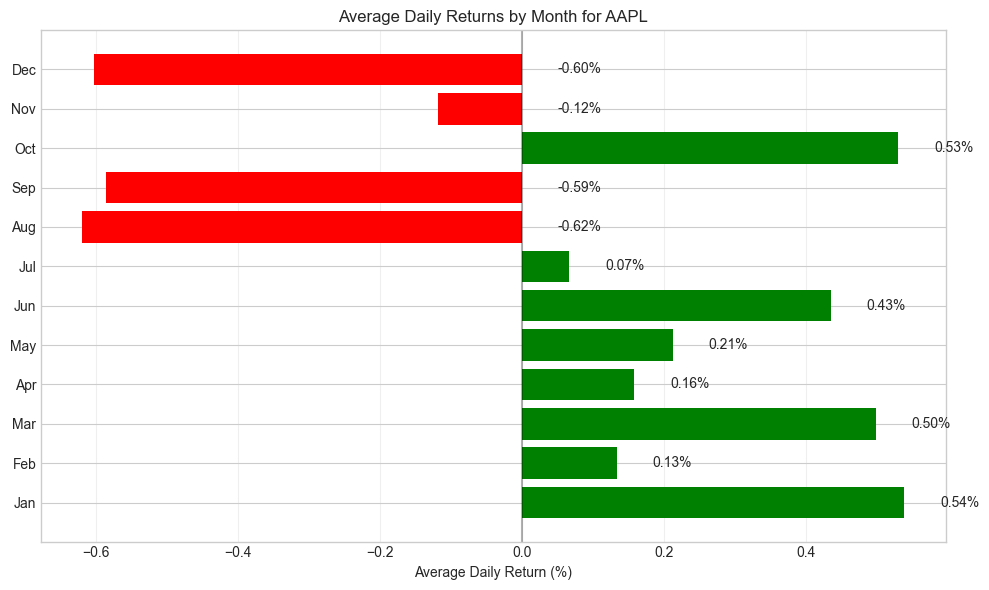

In [13]:
# Create a horizontal bar chart of average returns by month
plt.figure(figsize=(10, 6))

# Calculate average return for each month across all years
month_avg = monthly_stats.groupby('month_name')['return_mean'].mean() * 100

# Define the month order for proper sorting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_avg = month_avg.reindex(month_order)

# Create color map: green for positive returns, red for negative
colors = ['green' if x >= 0 else 'red' for x in month_avg]

# Create the bar chart
bars = plt.barh(month_avg.index, month_avg, color=colors)

# Add data labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width > 0 else 0
    plt.text(label_x_pos + 0.05, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}%', va='center')

plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)  # Add a vertical line at x=0
plt.xlabel('Average Daily Return (%)')
plt.title(f'Average Daily Returns by Month for {selected_ticker}')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Step 8: Compare Monthly Price Changes

Now let's visualize the total monthly price changes (not just average daily returns).

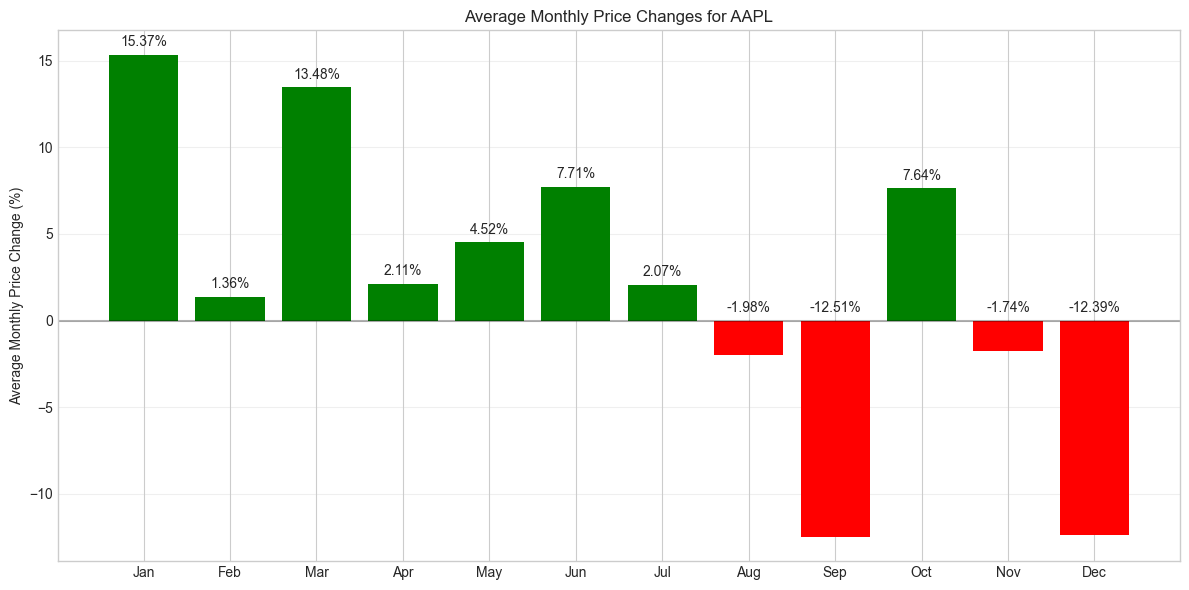

In [14]:
# Create a visualization of monthly price changes
plt.figure(figsize=(12, 6))

# Calculate average price change for each month across all years
month_price_change = monthly_stats.groupby('month_name')['price_change_pct'].mean()
month_price_change = month_price_change.reindex(month_order)

# Create color map: green for positive changes, red for negative
colors = ['green' if x >= 0 else 'red' for x in month_price_change]

# Create the bar chart
bars = plt.bar(month_price_change.index, month_price_change, color=colors)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    label_y_pos = height if height > 0 else 0
    plt.text(bar.get_x() + bar.get_width()/2, label_y_pos + 0.5, 
             f'{height:.2f}%', ha='center')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add a horizontal line at y=0
plt.ylabel('Average Monthly Price Change (%)')
plt.title(f'Average Monthly Price Changes for {selected_ticker}')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Step 9: Compare Returns vs Volatility by Month

Let's create a scatter plot to visualize the relationship between returns and volatility for each month.

/var/folders/dm/gdlv246s3gb0zcz60k72q8yw0000gq/T/ipykernel_9777/1652904476.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (month_risk_return['return_std'][i], month_risk_return['return_mean'][i]),


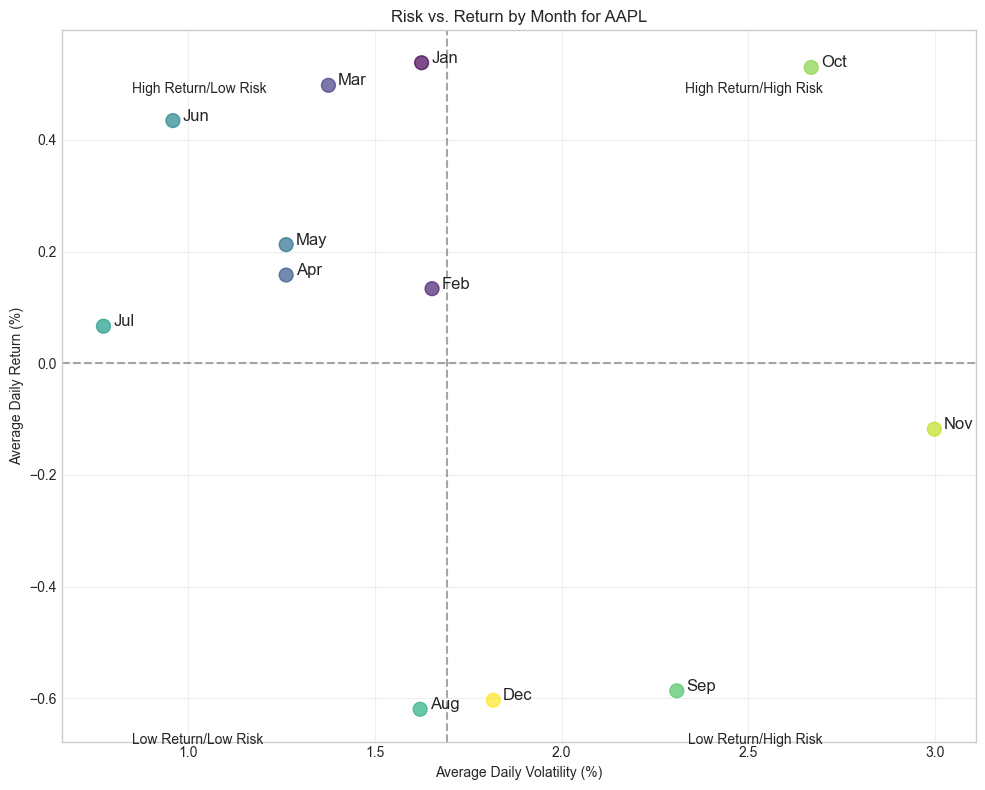

In [15]:
# Calculate average return and volatility by month
month_risk_return = monthly_stats.groupby('month_name').agg({
    'return_mean': 'mean',  # Average return
    'return_std': 'mean'    # Average volatility (standard deviation)
}) * 100  # Convert to percentages

# Reorder by month
month_risk_return = month_risk_return.reindex(month_order)

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(month_risk_return['return_std'], month_risk_return['return_mean'], 
            s=100, alpha=0.7, c=range(len(month_risk_return)), cmap='viridis')

# Add month labels to each point
for i, month in enumerate(month_risk_return.index):
    plt.annotate(month, 
                 (month_risk_return['return_std'][i], month_risk_return['return_mean'][i]),
                 xytext=(7, 0), textcoords='offset points', fontsize=12)

# Add quadrant lines
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=month_risk_return['return_std'].mean(), color='gray', linestyle='--', alpha=0.7)

# Add quadrant labels
plt.text(month_risk_return['return_std'].max() * 0.9, month_risk_return['return_mean'].max() * 0.9, 
         'High Return/High Risk', fontsize=10, ha='right')
plt.text(month_risk_return['return_std'].min() * 1.1, month_risk_return['return_mean'].max() * 0.9, 
         'High Return/Low Risk', fontsize=10, ha='left')
plt.text(month_risk_return['return_std'].max() * 0.9, month_risk_return['return_mean'].min() * 1.1, 
         'Low Return/High Risk', fontsize=10, ha='right')
plt.text(month_risk_return['return_std'].min() * 1.1, month_risk_return['return_mean'].min() * 1.1, 
         'Low Return/Low Risk', fontsize=10, ha='left')

plt.xlabel('Average Daily Volatility (%)')
plt.ylabel('Average Daily Return (%)')
plt.title(f'Risk vs. Return by Month for {selected_ticker}')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Step 10: Analyze the Best and Worst Months

Let's identify which months historically have the best and worst returns.

In [16]:
# Calculate the average returns by month and sort
avg_returns_by_month = monthly_stats.groupby('month_name')['return_mean'].mean() * 100
avg_returns_by_month = avg_returns_by_month.reindex(month_order)

# Best months
best_months = avg_returns_by_month.sort_values(ascending=False).head(3)
print(f"Top 3 Months with Highest Average Returns for {selected_ticker}:")
for month, ret in best_months.items():
    print(f"  {month}: {ret:.2f}%")

# Worst months
worst_months = avg_returns_by_month.sort_values().head(3)
print(f"\nTop 3 Months with Lowest Average Returns for {selected_ticker}:")
for month, ret in worst_months.items():
    print(f"  {month}: {ret:.2f}%")

# Calculate month-by-month consistency (positive return frequency)
pos_freq = monthly_stats.groupby('month_name').apply(
    lambda x: (x['return_mean'] > 0).mean() * 100
).reindex(month_order)

print(f"\nPercentage of Times Each Month Had Positive Returns:")
for month, freq in pos_freq.items():
    print(f"  {month}: {freq:.1f}%")

Top 3 Months with Highest Average Returns for AAPL:
  Jan: 0.54%
  Oct: 0.53%
  Mar: 0.50%

Top 3 Months with Lowest Average Returns for AAPL:
  Aug: -0.62%
  Dec: -0.60%
  Sep: -0.59%

Percentage of Times Each Month Had Positive Returns:
  Jan: 100.0%
  Feb: 100.0%
  Mar: 100.0%
  Apr: 100.0%
  May: 100.0%
  Jun: 100.0%
  Jul: 100.0%
  Aug: 0.0%
  Sep: 0.0%
  Oct: 100.0%
  Nov: 0.0%
  Dec: 0.0%


/var/folders/dm/gdlv246s3gb0zcz60k72q8yw0000gq/T/ipykernel_9777/207543715.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pos_freq = monthly_stats.groupby('month_name').apply(


## Step 12: Create a Monthly Returns Calendar Heatmap

Let's visualize returns in a calendar-like layout by year and month.

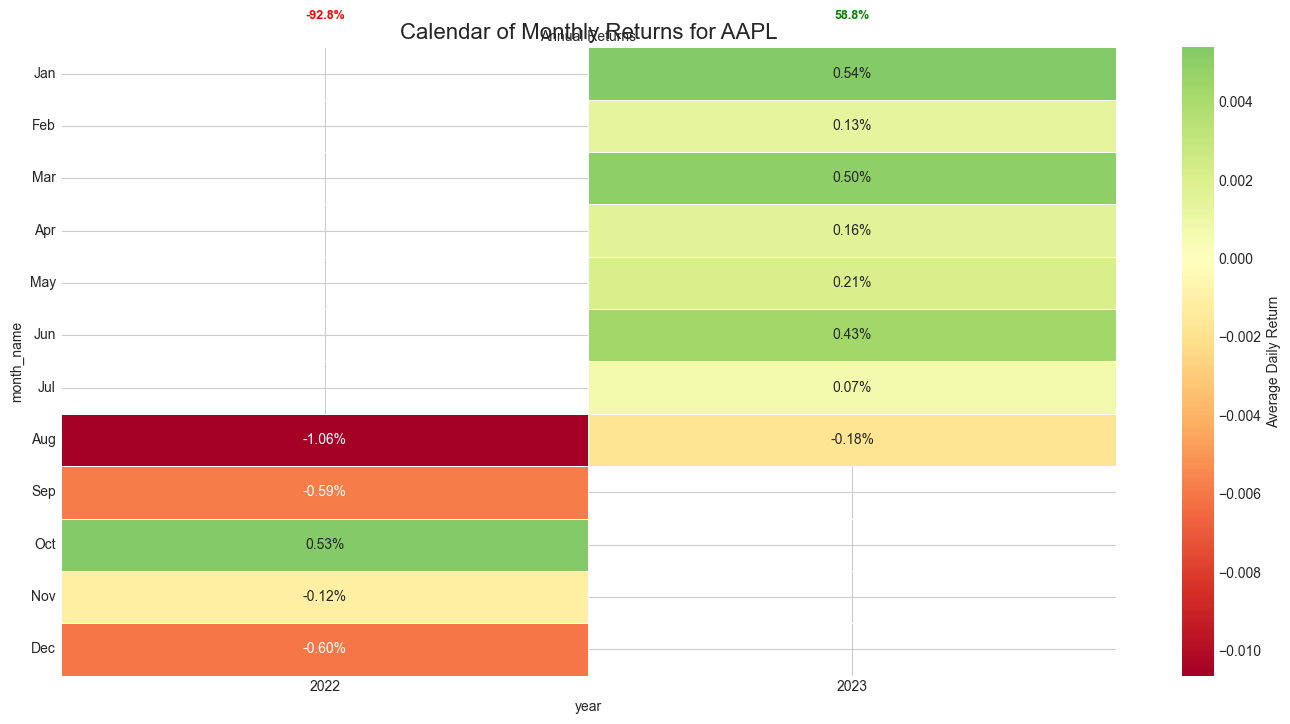

In [17]:
# First, create the pivot data we need for the heatmap
pivot_data = monthly_stats.pivot(index='month_name', columns='year', values='return_mean')
pivot_data = pivot_data.reindex(month_order)

# Create a calendar heatmap
plt.figure(figsize=(14, 8))

# Create a mask for missing data to show blank cells
mask = pivot_data.isna()

# Create the heatmap with blank cells for missing data
ax = sns.heatmap(pivot_data, annot=True, fmt='.2%', cmap='RdYlGn', center=0,
            linewidths=.5, cbar_kws={'label': 'Average Daily Return'}, mask=mask)

# Add a title
plt.title(f'Calendar of Monthly Returns for {selected_ticker}', fontsize=16)

# Customize the y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Add annotations for annual returns
annual_returns = monthly_stats.groupby('year')['return_mean'].mean() * 100 * 252  # Approximate annual return
for i, year in enumerate(pivot_data.columns):
    if year in annual_returns.index:
        plt.text(i + 0.5, -0.6, f'{annual_returns[year]:.1f}%', 
                 ha='center', va='center', fontsize=9, fontweight='bold',
                 color='green' if annual_returns[year] >= 0 else 'red')

plt.text(len(pivot_data.columns)/2, -0.2, 'Annual Returns', 
         ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for annual returns
plt.show()

## Step 13: Compare Multiple Stocks (Optional)

Now let's compare monthly returns across multiple stocks.

Comparing monthly returns for: TMO, TJX, ALB, IT, PPG


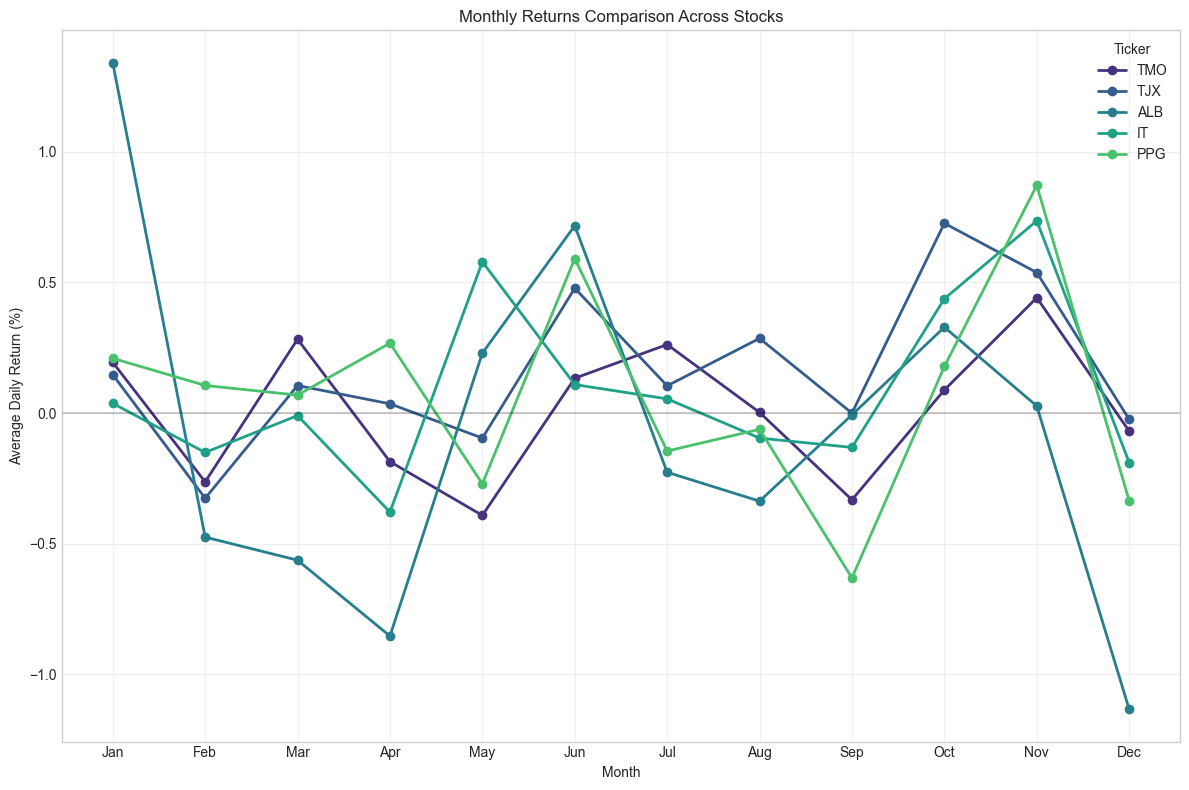

In [18]:
# Select a few different tickers for comparison
comparison_tickers = list(tickers[:5])  # Just use the first 5 tickers
print(f"Comparing monthly returns for: {', '.join(comparison_tickers)}")

# Function to calculate average monthly returns for a ticker
def get_monthly_returns(ticker):
    df_t = df_all[df_all['ticker'] == ticker].copy()
    df_t['date'] = pd.to_datetime(df_t['date'])
    df_t['month'] = df_t['date'].dt.month
    df_t['month_name'] = df_t['date'].dt.strftime('%b')
    
    monthly_avg = df_t.groupby('month_name')['return'].mean() * 100
    return monthly_avg.reindex(month_order)

# Collect monthly returns for each ticker
comparison_data = pd.DataFrame()
for ticker in comparison_tickers:
    comparison_data[ticker] = get_monthly_returns(ticker)

# Create a multi-line plot
plt.figure(figsize=(12, 8))

# Plot each ticker
for ticker in comparison_tickers:
    plt.plot(comparison_data.index, comparison_data[ticker], marker='o', linewidth=2, label=ticker)

plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)
plt.legend(title='Ticker')
plt.grid(alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Average Daily Return (%)')
plt.title('Monthly Returns Comparison Across Stocks')
plt.tight_layout()
plt.show()

## Step 14: Analyze Seasonal Patterns

Let's look for seasonal patterns by grouping months into seasons.

Seasonal Returns Analysis for AAPL:


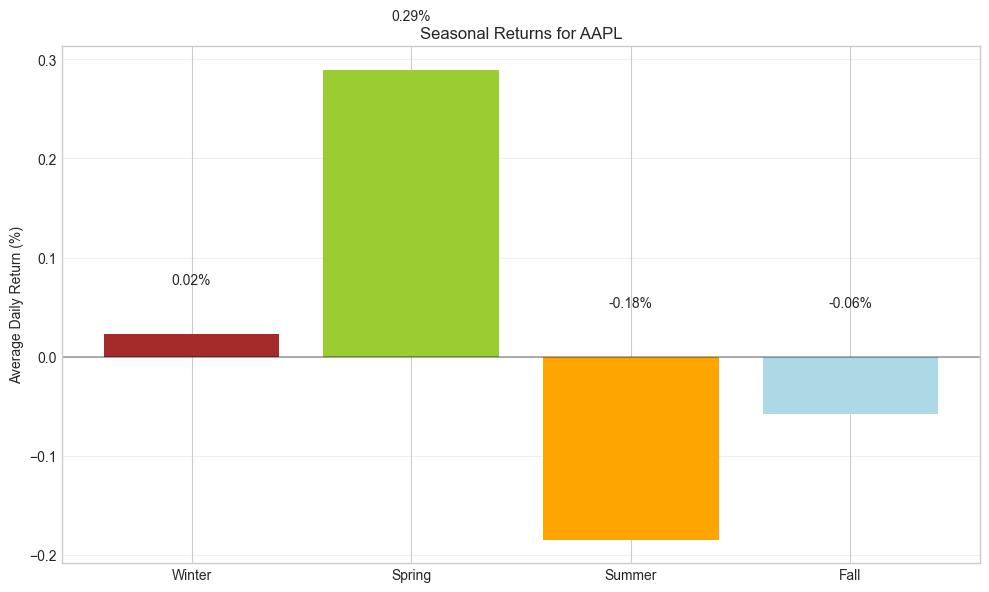

In [19]:
# Define seasons
seasons = {
    'Winter': ['Dec', 'Jan', 'Feb'],
    'Spring': ['Mar', 'Apr', 'May'],
    'Summer': ['Jun', 'Jul', 'Aug'],
    'Fall': ['Sep', 'Oct', 'Nov']
}

# Add season column to our data
def get_season(month_name):
    for season, months in seasons.items():
        if month_name in months:
            return season
    return None

monthly_stats['season'] = monthly_stats['month_name'].apply(get_season)

# Calculate seasonal returns
seasonal_returns = monthly_stats.groupby('season')['return_mean'].mean() * 100
seasonal_volatility = monthly_stats.groupby('season')['return_std'].mean() * 100

# Create a combined DataFrame
seasonal_data = pd.DataFrame({
    'Return (%)': seasonal_returns,
    'Volatility (%)': seasonal_volatility
})

# Display seasonal returns data
print(f"Seasonal Returns Analysis for {selected_ticker}:")
seasonal_data

# Create a bar chart of seasonal returns
plt.figure(figsize=(10, 6))

# Define colors for seasons
season_colors = {
    'Winter': 'lightblue',
    'Spring': 'yellowgreen',
    'Summer': 'orange',
    'Fall': 'brown'
}
colors = [season_colors[season] for season in seasonal_returns.index]

# Create the bar chart
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_returns = seasonal_returns.reindex(season_order)

bars = plt.bar(seasonal_returns.index, seasonal_returns, color=colors)

# Add data labels
for bar in bars:
    height = bar.get_height()
    label_y_pos = height if height > 0 else 0
    plt.text(bar.get_x() + bar.get_width()/2, label_y_pos + 0.05, 
             f'{height:.2f}%', ha='center')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.ylabel('Average Daily Return (%)')
plt.title(f'Seasonal Returns for {selected_ticker}')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Step 16: Summary and Key Findings

Let's summarize what we've learned from our monthly returns analysis.


 Monthly Returns Analysis Summary for AAPL 

Overall average daily return: 0.00%
Best performing month: Jan (0.54%)
Worst performing month: Aug (-0.62%)
Best performing season: Spring (0.29%)
Months with positive average returns: 8 out of 12


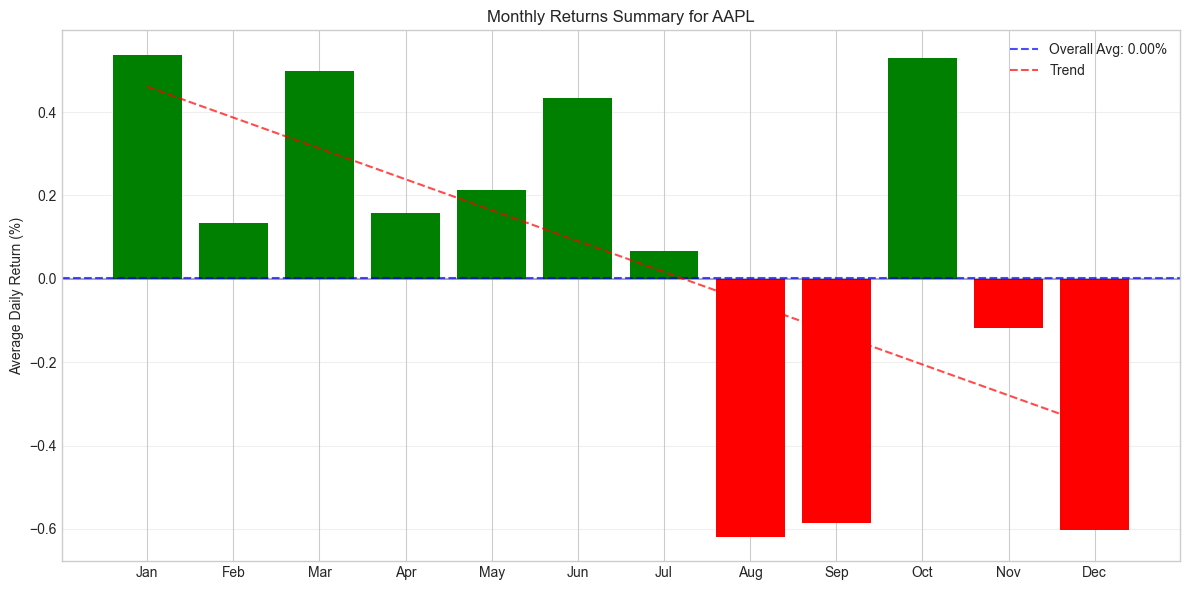

In [20]:
# Calculate key statistics
best_month = avg_returns_by_month.idxmax()
worst_month = avg_returns_by_month.idxmin()
best_season = seasonal_returns.idxmax()
best_month_return = avg_returns_by_month.max()
worst_month_return = avg_returns_by_month.min()
overall_avg_return = monthly_stats['return_mean'].mean() * 100
months_with_positive_returns = len(avg_returns_by_month[avg_returns_by_month > 0])

print(f"\n Monthly Returns Analysis Summary for {selected_ticker} \n")
print(f"Overall average daily return: {overall_avg_return:.2f}%")
print(f"Best performing month: {best_month} ({best_month_return:.2f}%)")
print(f"Worst performing month: {worst_month} ({worst_month_return:.2f}%)")
print(f"Best performing season: {best_season} ({seasonal_returns[best_season]:.2f}%)")
print(f"Months with positive average returns: {months_with_positive_returns} out of 12")

# Create a summary visualization
plt.figure(figsize=(12, 6))

# Plot average returns by month with month labels
plt.bar(range(len(avg_returns_by_month)), avg_returns_by_month, 
        color=['green' if x >= 0 else 'red' for x in avg_returns_by_month])
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=overall_avg_return, color='blue', linestyle='--', alpha=0.7, 
            label=f'Overall Avg: {overall_avg_return:.2f}%')

# Add trend line
z = np.polyfit(range(len(avg_returns_by_month)), avg_returns_by_month, 1)
p = np.poly1d(z)
plt.plot(range(len(avg_returns_by_month)), p(range(len(avg_returns_by_month))), 
         "r--", alpha=0.7, label='Trend')

plt.xticks(range(len(avg_returns_by_month)), avg_returns_by_month.index)
plt.ylabel('Average Daily Return (%)')
plt.title(f'Monthly Returns Summary for {selected_ticker}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()